#Worksheet- 0: Python Essentials for Machine Learning.
##Name: Shailendra Kumar Yadav


#7.1 : Warming up Exercise
Task 1: Classify Study Time

In [ ]:
# Our data: each day has (study, entertainment, sleep) hours
time_data = [
    (3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
    (4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
    (5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
    (3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
    (4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]

# Create empty lists for each category
low_study = []      # less than 3 hours
medium_study = []   # 3 to 5 hours
high_study = []     # more than 5 hours

# Go through each day and sort study hours into categories
for day in time_data:
    study_hours = day[0]  # Get study hours from the day

    if study_hours < 3:
        low_study.append(study_hours)
    elif study_hours <= 5:
        medium_study.append(study_hours)
    else:
        high_study.append(study_hours)

# Show the results
print("Low study hours:", low_study)
print("Medium study hours:", medium_study)
print("High study hours:", high_study)

Low study hours: [2.5, 1.5, 2.0, 2.5]
Medium study hours: [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High study hours: [5.5, 6.0]


Task 2: Count Study Time Days

In [ ]:
# Count how many days in each category
print("Days with low study time:", len(low_study))
print("Days with medium study time:", len(medium_study))
print("Days with high study time:", len(high_study))

Days with low study time: 4
Days with medium study time: 9
Days with high study time: 2


Task 3: Convert to Minutes

In [ ]:
# Convert study hours to minutes (hours × 60)
study_minutes = []

for day in time_data:
    study_hours = day[0]
    minutes = study_hours * 60  # Convert to minutes
    study_minutes.append(minutes)

print("Study hours in minutes:", study_minutes)

Study hours in minutes: [210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]


Task 4: Average Time

In [ ]:
# Calculate average hours for each activity
total_study = 0
total_entertainment = 0
total_sleep = 0

# Add  all the hours
for day in time_data:
    total_study += day[0]        # Study hours
    total_entertainment += day[1] # Entertainment hours
    total_sleep += day[2]        # Sleep hours

# How many days we have
days_count = len(time_data)

# Calculate averages
avg_study = total_study / days_count
avg_entertainment = total_entertainment / days_count
avg_sleep = total_sleep / days_count

# Show results with 2 decimal places
print("Average study hours:", round(avg_study, 2))
print("Average entertainment hours:", round(avg_entertainment, 2))
print("Average sleep hours:", round(avg_sleep, 2))

Average study hours: 3.7
Average entertainment hours: 2.5
Average sleep hours: 7.17


Task 5: Visualization- Study vs Sleep Pattern:

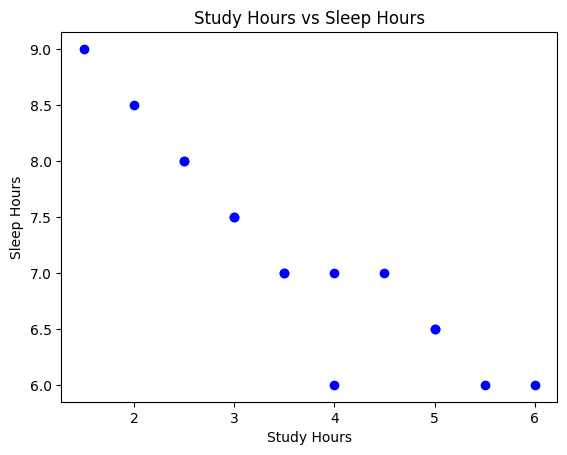

In [ ]:
import matplotlib.pyplot as plt

# Get study and sleep hours from data
study_hours = [day[0] for day in time_data]  # All study hours
sleep_hours = [day[2] for day in time_data]  # All sleep hours

# Create scatter plot
plt.scatter(study_hours, sleep_hours, color='blue')
plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.title('Study Hours vs Sleep Hours')
plt.show()

# 8.1.1 Exercise- Recursion:
 Task 1: Sum of Nested Lists:

In [ ]:
def sum_nested_list(items):
    """
    Add  all numbers in a list, even if they're inside other lists
    """
    total = 0

    # Look at each item in the list
    for item in items:
        if type(item) == list:
            # If it's another list, go inside it and add those numbers
            total += sum_nested_list(item)
        else:
            # If it's a number, just add it
            total += item

    return total

# Test with a nested list
my_list = [1, [2, [3, 4], 5], 6, [7, 8]]
result = sum_nested_list(my_list)
print("Total sum of nested list:", result)  # Should be 36

Total sum of nested list: 36


Task 2: String Permutations

In [ ]:
def get_permutations(text):
    """
    Get all possible arrangements of letters in a word
    """
    # If word has only 1 letter, just return that letter
    if len(text) == 1:
        return [text]

    results = []  # Store all arrangements here

    # Try each letter as the first letter
    for i in range(len(text)):
        first_letter = text[i]
        remaining_letters = text[:i] + text[i+1:]  # Letters left

        # Get all arrangements of remaining letters
        for arrangement in get_permutations(remaining_letters):
            results.append(first_letter + arrangement)

    return results

# Test with "abc"
permutations = get_permutations("abc")
print("All arrangements of 'abc':", permutations)

All arrangements of 'abc': ['abc', 'acb', 'bac', 'bca', 'cab', 'cba']


Task 3: Directory Size

In [ ]:
def get_directory_size(folder):
    """
    Calculate total size of all files in folder and subfolders
    """
    total_size = 0

    # Look at each item in the folder
    for item_name in folder:
        item_value = folder[item_name]

        if type(item_value) == dict:
            # If it's a subfolder, calculate its size
            total_size += get_directory_size(item_value)
        else:
            # If it's a file, add its size
            total_size += item_value

    return total_size

# Test with sample files
files = {
    "file1.txt": 200,
    "file2.txt": 300,
    "subdir1": {
        "file3.txt": 400,
        "file4.txt": 100
    }
}

total = get_directory_size(files)
print("Total directory size:", total, "KB")  # Should be 1000

Total directory size: 1000 KB


#8.2.1 Exercises- Dynamic Programming
Task 1: Coin Change

In [ ]:
def min_coins(coins, target):
    """
    Find minimum coins needed to make target amount
    """
    # Create array to store answers for each amount
    dp = [float('inf')] * (target + 1)
    dp[0] = 0  # 0 coins needed for 0 amount

    # Try each coin
    for coin in coins:
        # For each amount we can make with this coin
        for amount in range(coin, target + 1):
            # Check if using this coin gives fewer coins
            if dp[amount - coin] + 1 < dp[amount]:
                dp[amount] = dp[amount - coin] + 1

    # If we can't make the amount, return -1
    return dp[target] if dp[target] != float('inf') else -1

# Test: coins [1,2,5] to make 11
coins = [1, 2, 5]
amount = 11
result = min_coins(coins, amount)
print("Minimum coins needed:", result)  # Should be 3 (5+5+1)

Minimum coins needed: 3


Task 2: Longest Common Subsequence

In [ ]:
def longest_common_subsequence(text1, text2):
    """
    Find length of longest common sequence in two strings
    """
    m, n = len(text1), len(text2)

    # Create table to store results
    table = [[0] * (n + 1) for _ in range(m + 1)]

    # Fill the table
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if text1[i-1] == text2[j-1]:
                # Letters match, add 1 to previous result
                table[i][j] = table[i-1][j-1] + 1
            else:
                # Letters don't match, take best from left or above
                table[i][j] = max(table[i-1][j], table[i][j-1])

    return table[m][n]

# Test with "abcde" and "ace"
s1 = "abcde"
s2 = "ace"
result = longest_common_subsequence(s1, s2)
print("Longest common sequence length:", result)  # Should be 3

Longest common sequence length: 3


Task 3: Knapsack Problem

In [ ]:
def knapsack(weights, values, capacity):
    """
    Choose items to maximize value without exceeding weight limit
    """
    n = len(weights)

    # Create table to store maximum values
    table = [[0] * (capacity + 1) for _ in range(n + 1)]

    # Fill the table
    for i in range(1, n + 1):
        for w in range(1, capacity + 1):
            if weights[i-1] <= w:
                # Can choose to take or not take the item
                table[i][w] = max(table[i-1][w],
                                 values[i-1] + table[i-1][w - weights[i-1]])
            else:
                # Can't take this item (too heavy)
                table[i][w] = table[i-1][w]

    return table[n][capacity]

# Test
weights = [1, 3, 4, 5]
values = [1, 4, 5, 7]
capacity = 7
result = knapsack(weights, values, capacity)
print("Maximum value in knapsack:", result)  # Should be 9

Maximum value in knapsack: 9
